In [ ]:
from preference_graph import *

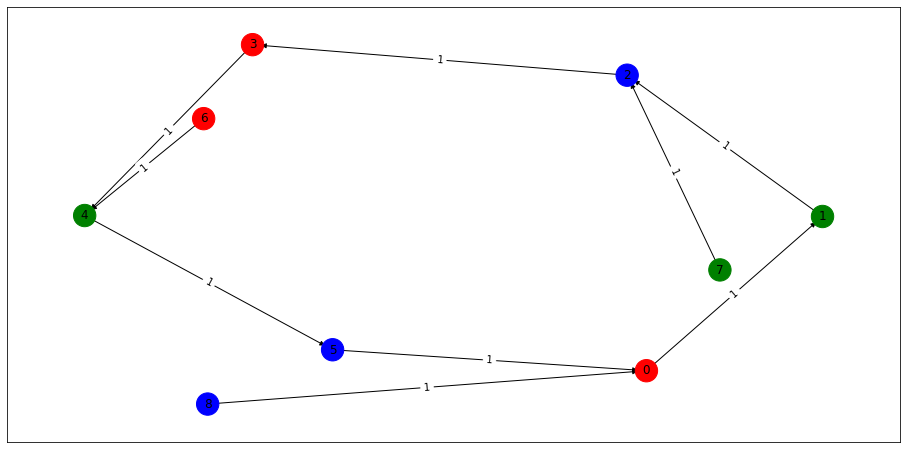

In [ ]:
# Visualization of the preference graph with basic_subgraph_index=5 
# and no other outgoing edges for each vertex
g = PreferenceGraph(5, '000000000')
g.draw_edges()

In [ ]:
# all possible triplets of man, woman and dog
triplets = np.array(np.meshgrid([0, 3, 6], [1, 4, 7], [2, 8, 5])).T.reshape(-1, 3)

# check if all vertexes in the combination of 2 or 3 triplets are different 
check = lambda comb: len(np.array(comb).flatten()) == len(set(np.array(comb).flatten()))

# combinations of triplets with all different vertexes inside
triplets_combs = list(filter(check, combinations(triplets, 3))) + list(
    filter(check, combinations(triplets, 2))) + [tuple([t]) for t in triplets]

In [ ]:
def make_string(x):
    '''
    Parameters:
      x \in {0, ..., 5^9 - 1}
    Makes string of length 9 with x's five-fold number notation 
    '''
    return '0' * (9 - len(np.base_repr(x, 5))) + np.base_repr(x, 5)

In [ ]:
from tqdm import tqdm

In [ ]:
# check for basic_graph_index = 0
basic_graph_index = 0
special = None
for rest_edges_code in tqdm(range(5 ** 9)):
    g = PreferenceGraph(basic_graph_index, make_string(rest_edges_code))
    comb_results = []
    for comb in triplets_combs:
        comb_results.append(g.find_blocking_for_comb(comb))
        if comb_results[-1] == False:
            break
    if (comb_results[-1] is not False) and (True in comb_results):
        special = g
        break
if special is None:
    print('OK for basic_graph_index = {}\n'.format(str(basic_graph_index)))

100%|██████████| 1953125/1953125 [36:13<00:00, 898.51it/s] 

OK for basic_graph_index = 0



In [ ]:
adjacency_list = lambda g: [
                            [(g.edges[v][i]._from, g.edges[v][i]._to, g.edges[v][i]._weight) for i in range(
                                len(g.edges[v]))]
                            for v in range(len(g.edges))]
adjacency_list(g)           

[[(0, 1, 1)],
 [(1, 2, 1)],
 [(2, 3, 1)],
 [(3, 4, 1)],
 [(4, 5, 1)],
 [(5, 0, 1)],
 [(6, 4, 1)],
 [(7, 2, 1)],
 [(8, 0, 1)]]

In [ ]:
# check for all the rest basic_graph_index values
specials = [[],]
for basic_graph_index in tqdm(range(1, 6)):
    specials.append([])
    for rest_edges_code in range(5 ** 9):
        g = PreferenceGraph(basic_graph_index, make_string(rest_edges_code))
        comb_results = []
        for comb in triplets_combs:
            comb_results.append(g.find_blocking_for_comb(comb))
            if comb_results[-1] == False:
                break
        if (comb_results[-1] is not False) and (True in comb_results):
            specials[basic_graph_index].append(adjacency_list(g))            

100%|██████████| 5/5 [3:17:42<00:00, 2372.51s/it]


In [ ]:
np.save('specials.npy', np.array(specials))

In [ ]:
np.load('specials.npy', allow_pickle=True)[1][1]

[[(0, 1, 1), (0, 4, 2)],
 [(1, 2, 1), (1, 8, 2)],
 [(2, 3, 1)],
 [(3, 4, 1), (3, 1, 3), (3, 7, 2)],
 [(4, 5, 1)],
 [(5, 0, 1), (5, 6, 2)],
 [(6, 7, 1), (6, 1, 2)],
 [(7, 8, 1), (7, 2, 3), (7, 5, 2)],
 [(8, 0, 1), (8, 3, 2)]]

In [ ]:
# number of graphs for each basic_index_subgraphs
[len(s) for s in specials]

[0, 2, 9, 8, 29, 18]

In [ ]:
edges_list = lambda all_edges: [
                                [[e._from, e._to, e._weight] for e in edges]
                            for edges in all_edges]

In [ ]:
import numpy as np
for basic_graph_index in range(1, 6):
    for i in range(len(specials[basic_graph_index])):
        np.save('graph_edges_{}_{}.npy'.format(str(basic_graph_index), 
                                               str(i)),
                np.array(edges_list(specials[basic_graph_index][i].edges)))

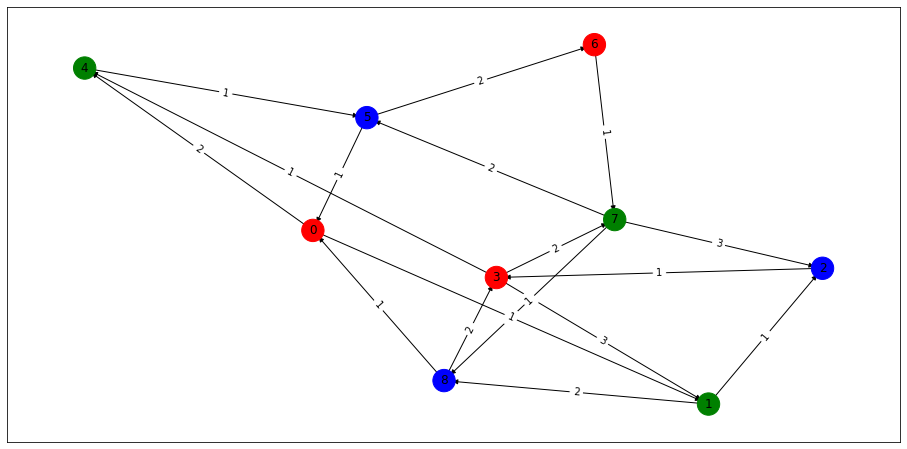

In [ ]:
special.draw_edges()

In [ ]:
special.show_edges()

(from: 0, to: 1, weight: 1)


(from: 0, to: 4, weight: 2)


(from: 1, to: 2, weight: 1)


(from: 1, to: 8, weight: 2)


(from: 2, to: 3, weight: 1)


(from: 3, to: 4, weight: 1)


(from: 3, to: 1, weight: 3)


(from: 3, to: 7, weight: 2)


(from: 4, to: 5, weight: 1)


(from: 5, to: 0, weight: 1)


(from: 5, to: 6, weight: 2)


(from: 6, to: 7, weight: 1)


(from: 7, to: 8, weight: 1)


(from: 7, to: 2, weight: 3)


(from: 7, to: 5, weight: 2)


(from: 8, to: 0, weight: 1)


(from: 8, to: 3, weight: 2)


